In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from IPython.core.display import HTML
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

%matplotlib inline
sns.set(style='whitegrid')

In [3]:
data = pd.read_csv("formual_E_Raceresults.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SeasonName       1502 non-null   object
 1   RaceName         1502 non-null   object
 2   Pos              1502 non-null   int64 
 3   DriverNumber     1502 non-null   object
 4   DriverFirstName  1502 non-null   object
 5   DriverLastName   1502 non-null   object
 6   Team             1502 non-null   object
 7   Started          1502 non-null   object
 8   Best             1502 non-null   object
 9   Time             1502 non-null   object
 10  PtsPoints        1502 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 129.2+ KB


In [4]:
data.head()

,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,Time,PtsPoints
0,Season 1 2014/15,Beijing E-Prix,1,#11,Lucas,Di Grassi,Audi Sport ABT Formula E Team,2,1:46.718,52:23.413,25
1,Season 1 2014/15,Beijing E-Prix,2,#27,Franck,Montagny,Andretti Autosport Formula E Team,8,1:46.640,+ 2.867,18
2,Season 1 2014/15,Beijing E-Prix,3,#2,Sam,Bird,Virgin Racing Formula E Team,11,1:46.563,+ 6.559,15
3,Season 1 2014/15,Beijing E-Prix,4,#28,Charles,Pic,Andretti Autosport Formula E Team,7,1:46.730,+ 19.301,12
4,Season 1 2014/15,Beijing E-Prix,5,#5,Karun,Chandhok,Mahindra Racing Formula E Team,4,1:45.892,+ 23.952,10


In [5]:
data.drop("Time", axis=1, inplace=True)

In [6]:
data.head()


,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
0,Season 1 2014/15,Beijing E-Prix,1,#11,Lucas,Di Grassi,Audi Sport ABT Formula E Team,2,1:46.718,25
1,Season 1 2014/15,Beijing E-Prix,2,#27,Franck,Montagny,Andretti Autosport Formula E Team,8,1:46.640,18
2,Season 1 2014/15,Beijing E-Prix,3,#2,Sam,Bird,Virgin Racing Formula E Team,11,1:46.563,15
3,Season 1 2014/15,Beijing E-Prix,4,#28,Charles,Pic,Andretti Autosport Formula E Team,7,1:46.730,12
4,Season 1 2014/15,Beijing E-Prix,5,#5,Karun,Chandhok,Mahindra Racing Formula E Team,4,1:45.892,10


In [7]:
def best_to_float(x):
    splitted = x.split(':')
    value = 0
    try:
        data = float(splitted[0]) * 60 + float(splitted[1])
    except:
        data = float(splitted[0]) * 60
    return data

In [8]:
data.drop(data[data['Best'] == '–'].index, inplace=True)
data['Best'] = data['Best'].str.replace("FL", '', regex=False)
data['Best'] = data['Best'].apply(lambda x: best_to_float(x))

In [9]:
data['Started'] = data['Started'].str.replace("P", '', regex=False)
data['Started'] = data['Started'].apply(lambda x: float(x))

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeasonName       1473 non-null   object 
 1   RaceName         1473 non-null   object 
 2   Pos              1473 non-null   int64  
 3   DriverNumber     1473 non-null   object 
 4   DriverFirstName  1473 non-null   object 
 5   DriverLastName   1473 non-null   object 
 6   Team             1473 non-null   object 
 7   Started          1473 non-null   float64
 8   Best             1473 non-null   float64
 9   PtsPoints        1473 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 126.6+ KB


In [11]:
oe = OrdinalEncoder()
oe_cols = oe.fit_transform(
    data[['DriverFirstName', 'DriverLastName', 'DriverNumber', 'RaceName', 'SeasonName', 'Team']])

data[['DriverFirstName', 'DriverLastName', 'DriverNumber', 'RaceName', 'SeasonName', 'Team']] = oe_cols

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeasonName       1473 non-null   float64
 1   RaceName         1473 non-null   float64
 2   Pos              1473 non-null   int64  
 3   DriverNumber     1473 non-null   float64
 4   DriverFirstName  1473 non-null   float64
 5   DriverLastName   1473 non-null   float64
 6   Team             1473 non-null   float64
 7   Started          1473 non-null   float64
 8   Best             1473 non-null   float64
 9   PtsPoints        1473 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 126.6 KB


In [12]:
data.head()


,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
0,0.0,1.0,1,2.0,32.0,18.0,5.0,2.0,106.718,25
1,0.0,1.0,2,15.0,15.0,43.0,2.0,8.0,106.640,18
2,0.0,1.0,3,9.0,57.0,4.0,41.0,11.0,106.563,15
3,0.0,1.0,4,16.0,8.0,49.0,2.0,7.0,106.730,12
4,0.0,1.0,5,26.0,28.0,12.0,23.0,4.0,105.892,10


In [13]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data[['Best']] = sc.fit_transform(data[['Best']])

data.describe()

,SeasonName,RaceName,Pos,DriverNumber,DriverFirstName,DriverLastName,Team,Started,Best,PtsPoints
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,2.899525,18.966056,7.590631,20.172437,34.132383,33.063815,21.553293,10.949084,0.069723,5.155465
std,1.898070,11.086747,5.829213,11.263102,19.843395,21.308041,12.140764,6.160510,0.238239,7.403244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,10.000000,2.000000,11.000000,16.000000,15.000000,11.000000,6.000000,0.002638,0.000000
50%,3.000000,19.000000,7.000000,18.000000,36.000000,32.000000,22.000000,11.000000,0.004163,1.000000
75%,4.000000,29.000000,12.000000,30.000000,50.000000,52.000000,32.000000,16.000000,0.007626,8.000000
max,6.000000,39.000000,23.000000,40.000000,66.000000,71.000000,41.000000,24.000000,1.000000,30.000000


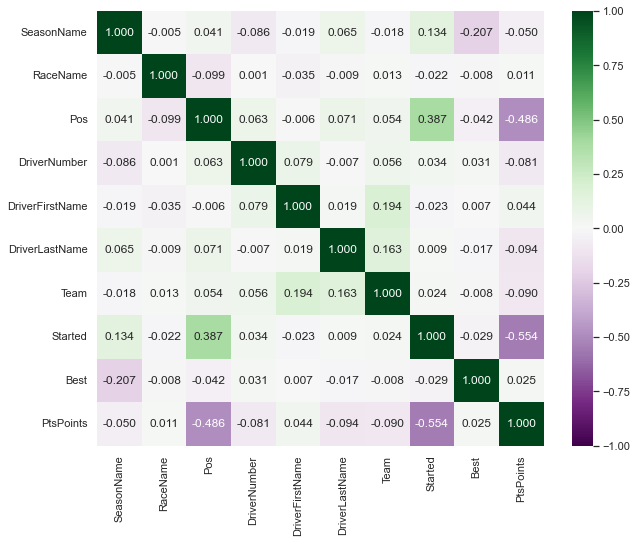

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(), annot=True, vmin=-1, vmax=1, fmt='.3f', cmap='PRGn')
plt.show()

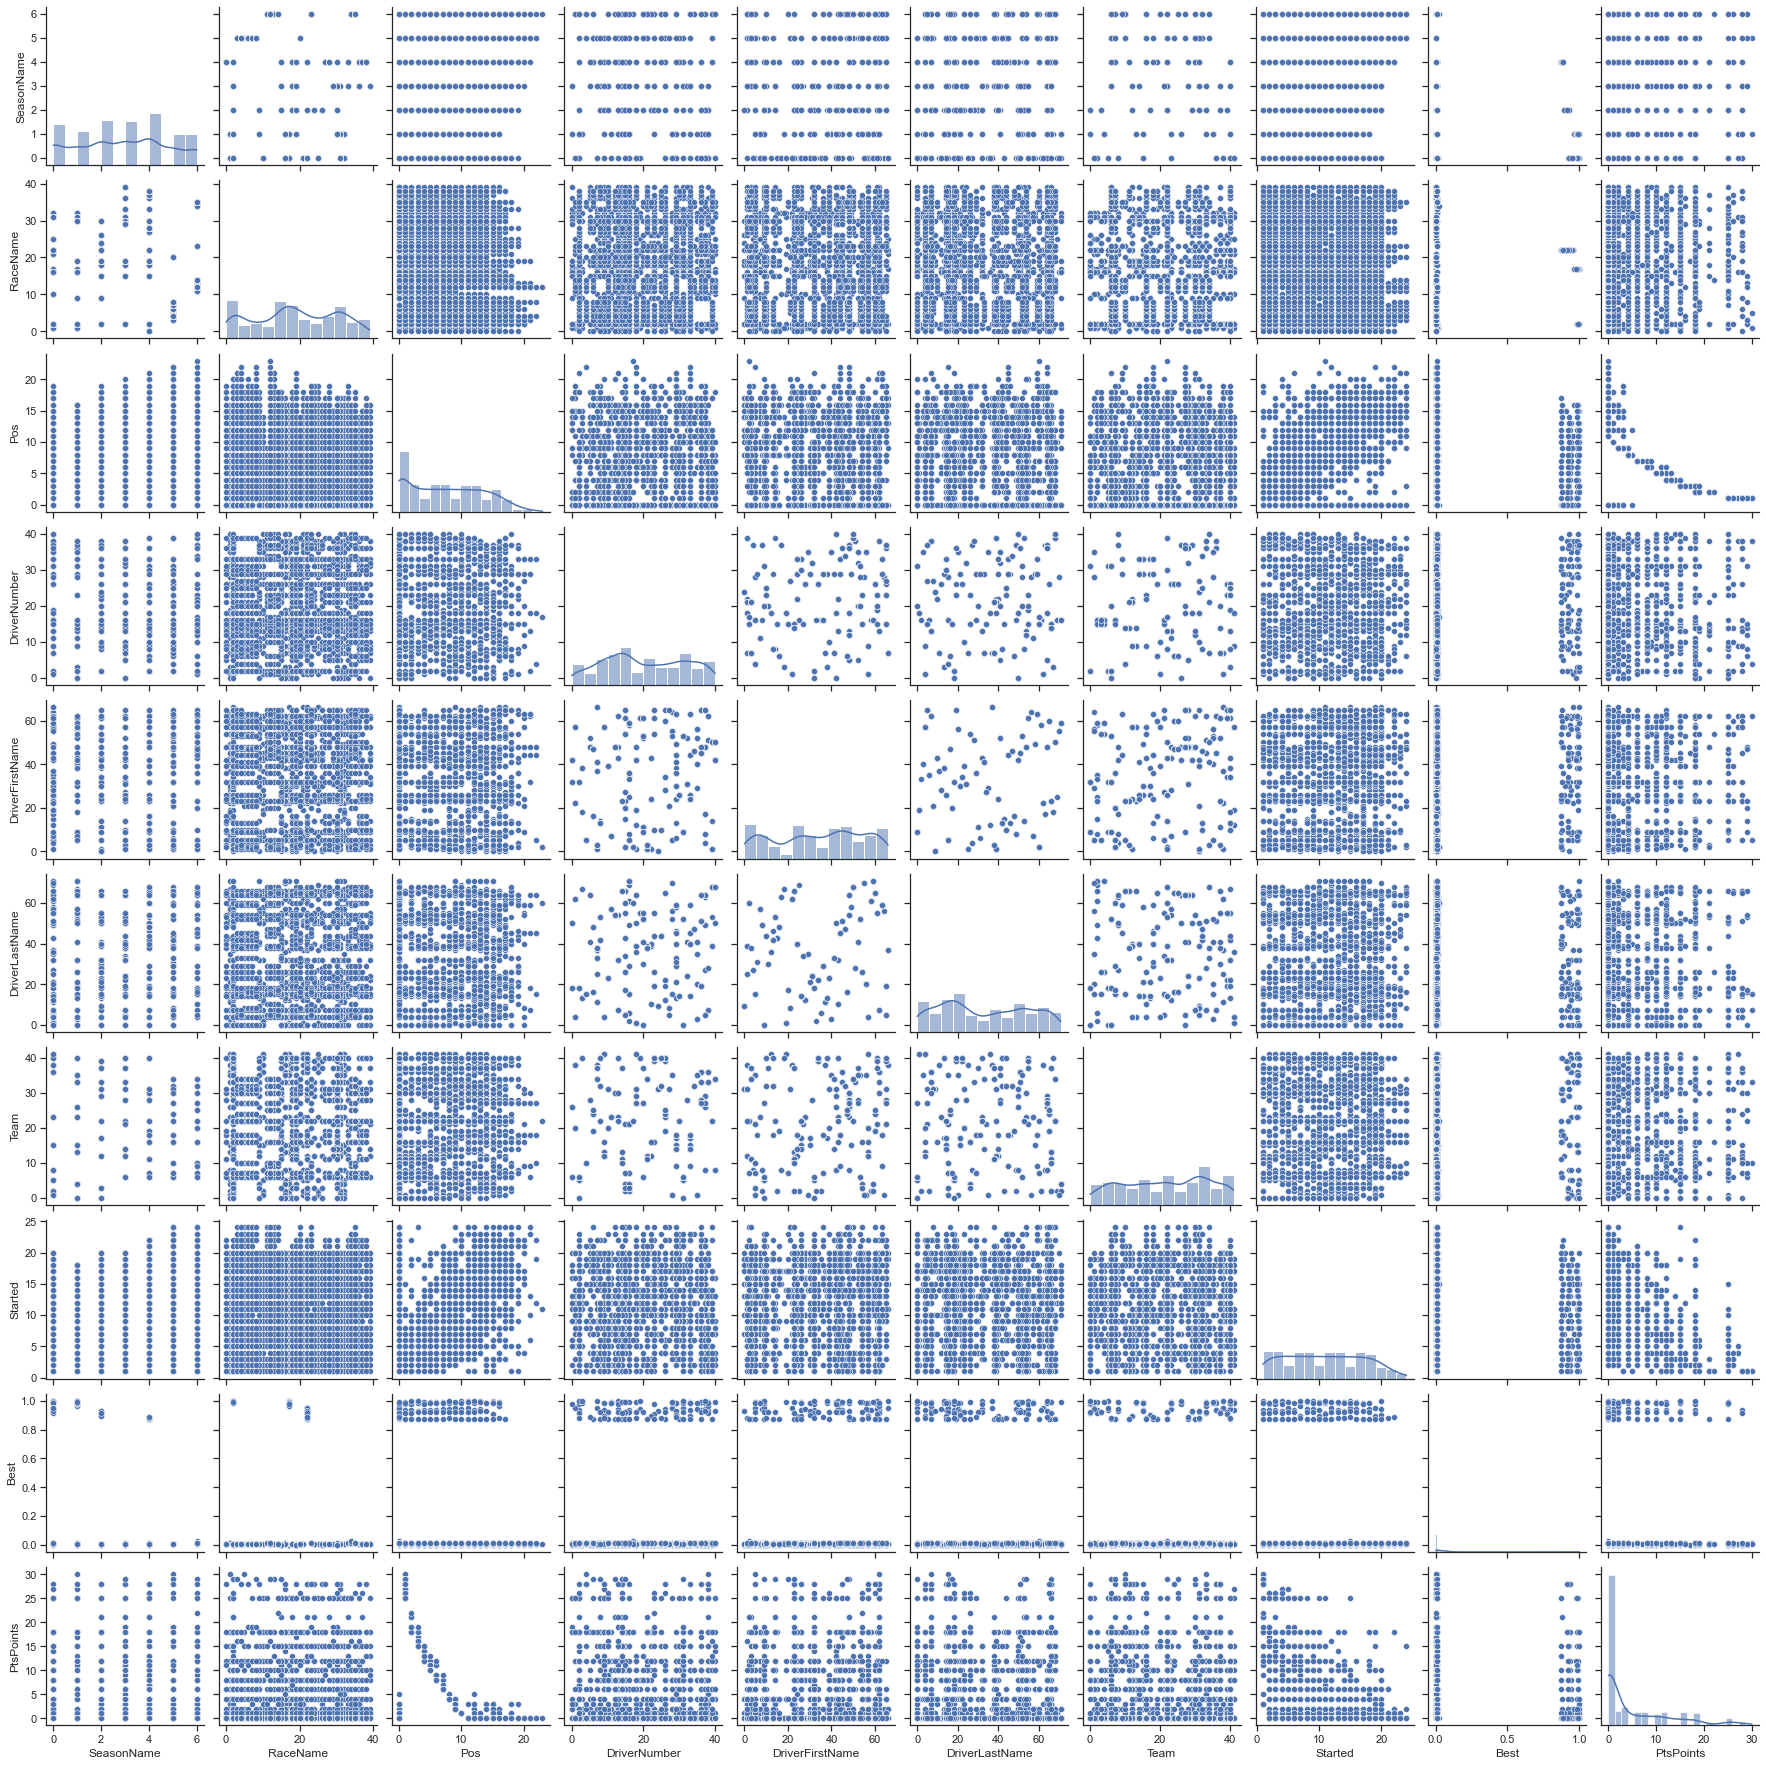

In [15]:
with sns.axes_style('ticks'):
    sns.pairplot(data=data,
                 diag_kws=dict(kde=True))
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

x = data.drop(columns=['PtsPoints'])
y = data['PtsPoints']
x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_scoring(y_true, y_pred):
    print('MAE: {};'.format(mean_absolute_error(y_true, y_pred)))
    print('MSE: {};'.format(mean_squared_error(y_true, y_pred)))
    print('R2: {}.'.format(r2_score(y_true, y_pred)))

In [18]:
rf_regressor = RandomForestRegressor(n_estimators=20, criterion='absolute_error', oob_score=True, random_state=7)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=20,
                      oob_score=True, random_state=7)

In [19]:
rf_regressor.oob_score_

0.9967965166663992

In [20]:
def plot_feature_importances(feature_names, tree_model):
    feature_importance_list = list(zip(feature_names, tree_model.feature_importances_))
    sorted_list = sorted(feature_importance_list, key=itemgetter(1), reverse=True)
    feature_order = [x for x, _ in sorted_list]

    plt.figure(figsize=(9,6))
    bar_plot = sns.barplot(x=feature_names, y=tree_model.feature_importances_,
                           order=feature_order)
    bar_plot.bar_label(bar_plot.containers[-1], fmt='%.3f')
    plt.show()

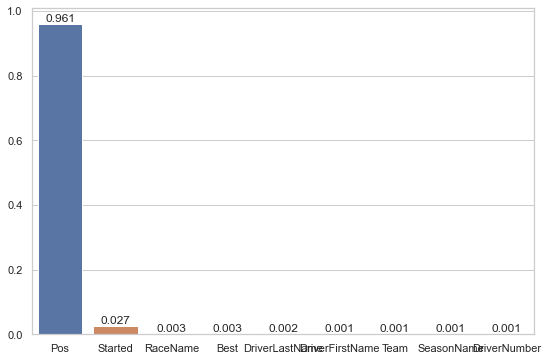

In [21]:
plot_feature_importances(x.columns.values, rf_regressor)

In [22]:
rf_pred = rf_regressor.predict(x_test)

In [32]:
model_scoring(y_test, rf_pred)

MAE: 0.19;
MSE: 0.18951694915254233;
R2: 0.9969290093112616.


In [23]:
parameters_to_tune = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                      'learning_rate': np.linspace(0.1, 0.5, 5),
                      'n_estimators' : np.arange(10, 51, 10),
                      'max_depth' : [3, 4, 5]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

gb_gs = RandomizedSearchCV(GradientBoostingRegressor(random_state=7), parameters_to_tune,
                     cv=5, scoring='neg_mean_absolute_error')
gb_gs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': array([10, 20, 30, 40, 50])},
                   scoring='neg_mean_absolute_error')

In [25]:
gb_gs.best_params_

{'n_estimators': 30,
 'max_depth': 4,
 'loss': 'squared_error',
 'learning_rate': 0.2}

In [26]:
gb_gs.best_score_

-0.14618241800991752

In [27]:
gb_regressor : GradientBoostingRegressor = gb_gs.best_estimator_
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=30,
                          random_state=7)

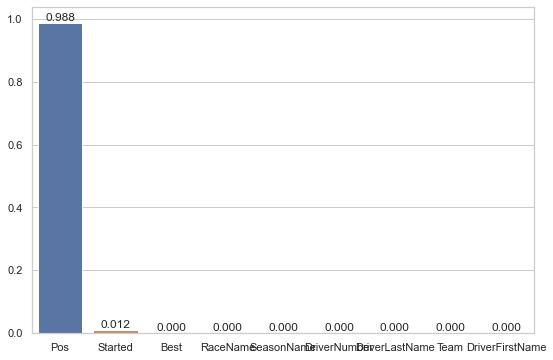

In [28]:
plot_feature_importances(x.columns.values, gb_regressor)

In [29]:
gb_pred = gb_regressor.predict(x_test)

In [30]:
model_scoring(y_test, gb_pred)

MAE: 0.17812294398987205;
MSE: 0.1666974488788733;
R2: 0.9972987834827828.


In [34]:
estimators = [
    ('Gradient Boosting', gb_regressor),
    ('Random Forest', rf_regressor)
]

In [38]:
alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(alphas))
stacking_regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('Gradient Boosting',
                               GradientBoostingRegressor(learning_rate=0.2,
                                                         max_depth=4,
                                                         n_estimators=30,
                                                         random_state=7)),
                              ('Random Forest',
                               RandomForestRegressor(criterion='absolute_error',
                                                     n_estimators=20,
                                                     oob_score=True,
                                                     random_state=7))],
                  final_estimator=RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])))

In [39]:
st_pred = stacking_regressor.predict(x_test)

In [43]:
model_scoring(y_test, st_pred)

MAE: 0.17727614203550537;
MSE: 0.16206756367240263;
R2: 0.9973738075606955.
